In [11]:
from os.path import join
import numpy as np
import pandas as pd
from nilearn import plotting
from nilearn import regions, maskers, masking, image, surface


In [5]:
main_dir = '/Users/h/Dropbox/projects_dropbox/cerebellar_atlases'
cerebellum = join(main_dir,'King_2019', 'atl-MDTB10_space-MNI_dseg.nii')
cerebellum_label = join(main_dir, 'King_2019', 'atl-MDTB10.tsv')


(141, 95, 87)

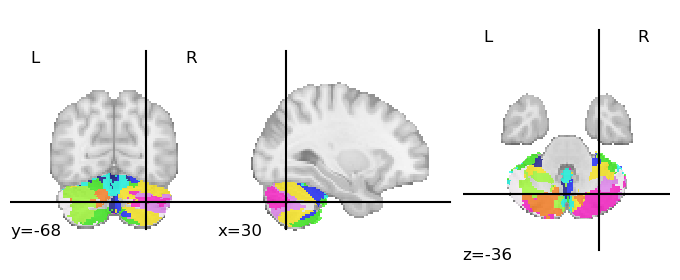

In [3]:
plotting.plot_roi(cerebellum)
cerebellum_atlas = image.load_img(cerebellum)
cerebellum_atlas.shape

In [6]:
labels = pd.read_csv(cerebellum_label, sep='\t')

In [7]:
labels

,index,name,color
0,1,Region1,#2ea698
1,2,Region2,#549720
2,3,Region3,#336693
3,4,Region4,#0e187d
4,5,Region5,#a517a2
5,6,Region6,#af2b46
6,7,Region7,#e17db0
7,8,Region8,#eca108
8,9,Region9,#fbd975
9,10,Region10,#7775f5


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:98: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


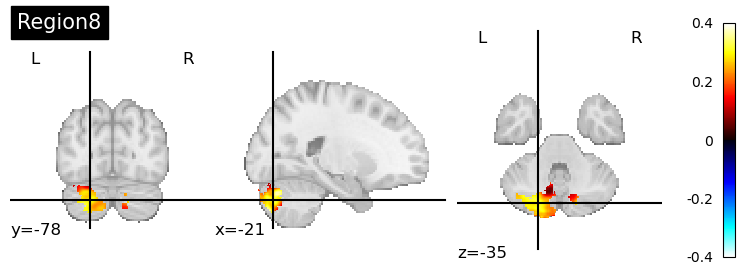

In [9]:
high_cue = '/Users/h/Documents/projects_local/sandbox/cue/sub-avg_ses-avg_run-avg_task-pain_event-stimulus_cuetype-high.nii.gz'
ref_img = image.load_img(high_cue)
canlab_dir = '/Users/h/Documents/MATLAB/CanlabCore'
mask = image.load_img(join(canlab_dir, 'CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_canlab.nii'))
# get region index
atlas_index = 7
atlas_label = labels.loc[atlas_index, 'name']
region_mask = (cerebellum_atlas.get_fdata() == atlas_index)
masked_roi = image.new_img_like(cerebellum_atlas, region_mask)
masker = maskers.NiftiMasker(mask_img=masked_roi)
masked_data = masker.fit_transform(ref_img)
masked_img = masker.inverse_transform(masked_data)
plotting.plot_stat_map(masked_img, title=f"{atlas_label}")

In [13]:
from nilearn import datasets
fsaverage = datasets.fetch_surf_fsaverage()
curv_right = surface.load_surf_data(fsaverage.curv_right)
curv_right_sign = np.sign(curv_right)

# plotting.plot_surf(stat_map_img=masked_img,
#                    #subject='subject_id', subject_dir='subject_dir',
#                    hemi='left', view='lateral', colorbar=True,
#                    title='Statistical Map')
surface_data = surface.load_surf_data('/Users/h/Dropbox/projects_dropbox/cerebellar_atlases/King_2019/atl-MDTB10_dseg.label.gii')
# texture = surface.vol_to_surf(ref_img, surface_data) #fsaverage.pial_right)
# Display the plot
fig = plotting.plot_surf_stat_map(
    surface_data, surface_data, hemi='right',
    title='Surface right hemisphere', colorbar=True,
    threshold=1., bg_map=surface_data,
)
plotting.show()

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/img_plotting.py:98: RuntimeWarning: overflow encountered in scalar negative
  vmin = -vmax


ValueError: The input type is not recognized. Valid inputs are one of the following file formats: .gii, .gii.gz, Freesurfer specific files such as '.orig', '.pial', '.sphere', '.white', '.infla'or two Numpy arrays organized in a list, tuple or a namedtuple with the fields "coordinates" and "faces"

In [15]:
fig = plotting.plot_surf(
    surface_data, hemi='right',
    title='Surface right hemisphere', colorbar=True,
    threshold=1., bg_map=surface_data,
)
plotting.show()

ValueError: The input type is not recognized. Valid inputs are one of the following file formats: .gii, .gii.gz, Freesurfer specific files such as '.orig', '.pial', '.sphere', '.white', '.infla'or two Numpy arrays organized in a list, tuple or a namedtuple with the fields "coordinates" and "faces"